In [1]:
import numpy as np
import math

R = np.diag([1.2,2.3,4.2])
R
speed_profile = [2.0] * 3
speed_profile
move_direction = math.atan2(1.0, 0.0)
move_direction

1.5707963267948966

In [9]:

c = np.random.randn(3,4) # 生成标准正态分布。均值为0，方差为1

c.shape

print(c)


[[-0.51202084 -0.26447207 -0.88193734 -0.09781247]
 [-0.37113883 -0.9446504  -0.04857926 -0.64503919]
 [ 0.56493048  1.69813349 -0.40286165 -0.94312859]]


In [11]:
# Import packages.
import cvxpy as cp
import numpy as np

# Generate a random non-trivial linear program.
m = 15
n = 10
np.random.seed(1)
s0 = np.random.randn(m)
lamb0 = np.maximum(-s0, 0)
s0 = np.maximum(s0, 0)
print(s0)
print("----")
x0 = np.random.randn(n)
A = np.random.randn(m, n)
b = A@x0 + s0
c = -A.T@lamb0

# Define and solve the CVXPY problem.
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize(c.T@x),
                 [A@x <= b])
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
print("A dual solution is")
print(prob.constraints[0].dual_value)

[1.62434536 0.         0.         0.         0.86540763 0.
 1.74481176 0.         0.3190391  0.         1.46210794 0.
 0.         0.         1.13376944]
----

The optimal value is -15.220912604404832
A solution x is
[-1.1015836  -0.16207264 -0.90072437  0.03042621  0.61108486 -1.13141957
  1.1270734   0.87833368  0.48871908  0.89807117]
A dual solution is
[2.45894208e-09 6.11756417e-01 5.28171745e-01 1.07296862e+00
 6.38551602e-09 2.30153871e+00 1.12756160e-09 7.61206895e-01
 1.31943038e-08 2.49370376e-01 2.02551464e-09 2.06014070e+00
 3.22417209e-01 3.84054335e-01 2.94504008e-09]


In [12]:
import numpy as np
import cvxpy as cp

# paramater
c = np.array([-40,-50])
A = np.array([
    [1,3],
    [2,1]
])
b = np.array([12,10])

# cost function
x = cp.Variable(c.shape[0])
constrains = [A@x <= b]
prob = cp.Problem(cp.Minimize(c.T@x), constrains)
prob.solve()

# result
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
print("A dual solution is")
print(prob.constraints[0].dual_value)


The optimal value is -284.0
A solution x is
[3.6 2.8]
A dual solution is
[12. 14.]


In [38]:
# quadratic programming

import numpy as np
import cvxpy as cp

# paramater
H = np.array([
    [1, 0],
    [0, 2]
])

c = np.array([1, 1])
M_eq = np.array([1, 1])

x = cp.Variable(2)
constraints = [M_eq.T@x == 1]
prob = cp.Problem(cp.Minimize(0.5*cp.quad_form(x,H) + c.T@x), 
                  constraints)
prob.solve()

print("\nThe optimal value is", prob.value)
print("A solution x is", x.value)
print("A dual solution is", prob.constraints[0].dual_value)




The optimal value is 1.3333333333333333
A solution x is [0.66666667 0.33333333]
A dual solution is -1.6666666666666667


In [46]:
# control
import numpy as np
import cvxpy as cp

np.random.seed(1)
n = 8
m = 2
T = 50
alpha = 0.2
beta = 3
A = np.eye(n) - alpha * np.random.rand(n, n)
B = np.random.randn(n, m)
x_0 = beta * np.random.randn(n)


x = cp.Variable((n, T + 1))
u = cp.Variable((m, T))

cost = 0
constr = []
for t in range(T):
    cost += cp.sum_squares(x[:, t]) + cp.sum_squares(u[:, t])
    constr += [x[:, t + 1] == A @ x[:, t] + B @ u[:, t], cp.norm(u[:, t], "inf") <= 1]
cost += cp.sum_squares(x[:, T])
# sums problem objectives and concatenates constraints.
constr += [x[:, T] == 0, x[:, 0] == x_0]
problem = cp.Problem(cp.Minimize(cost), constr)
problem.solve()

np.float64(2572.5816865967395)

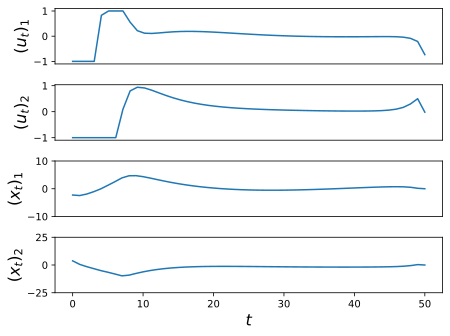

In [52]:
import numpy as np
import cvxpy as cp

np.random.seed(1)
n = 8
m = 2
T = 50
alpha = 0.2
beta = 3
A = np.eye(n) - alpha * np.random.rand(n, n)
B = np.random.randn(n, m)
x_0 = beta * np.random.randn(n)


x = cp.Variable((n, T + 1))
u = cp.Variable((m, T))

Q = np.eye(n)
R = np.eye(m)
H = np.eye(n)

cost = 0
constr = []
for t in range(T):
    cost += cp.quad_form(x[:, t], Q) + cp.quad_form(u[:, t], R)
    constr += [x[:, t + 1] == A @ x[:, t] + B @ u[:, t], cp.norm(u[:, t], "inf") <= 1]
cost += cp.quad_form(x[:, T], H)
# sums problem objectives and concatenates constraints.
constr += [x[:, T] == 0, x[:, 0] == x_0]
problem = cp.Problem(cp.Minimize(cost), constr)
problem.solve()

# 绘制控制过程
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

f = plt.figure()

# Plot (u_t)_1.
ax = f.add_subplot(411)
plt.plot(u[0, :].value)
plt.ylabel(r"$(u_t)_1$", fontsize=16)
plt.yticks(np.linspace(-1.0, 1.0, 3))
plt.xticks([])

# Plot (u_t)_2.
plt.subplot(4, 1, 2)
plt.plot(u[1, :].value)
plt.ylabel(r"$(u_t)_2$", fontsize=16)
plt.yticks(np.linspace(-1, 1, 3))
plt.xticks([])

# Plot (x_t)_1.
plt.subplot(4, 1, 3)
x1 = x[0, :].value
plt.plot(x1)
plt.ylabel(r"$(x_t)_1$", fontsize=16)
plt.yticks([-10, 0, 10])
plt.ylim([-10, 10])
plt.xticks([])

# Plot (x_t)_2.
plt.subplot(4, 1, 4)
x2 = x[1, :].value
plt.plot(range(51), x2)
plt.yticks([-25, 0, 25])
plt.ylim([-25, 25])
plt.ylabel(r"$(x_t)_2$", fontsize=16)
plt.xlabel(r"$t$", fontsize=16)
plt.tight_layout()
plt.show()